# Exploring Decision Tree Classification for IoT Data

In this notebook, we will explore:
- what applications Decision Trees are useful for
- how to use Decision Trees for Classification
- ensemble methods like Random Forest + Gradient Boosting
- how to evaluate the performance of Decision Tree-based models

### How do Decision Trees work?

Decision Trees are a frequently used machine learning algorithm in various types of classification and regression tasks. Though they are simple to implement, they are powerful models that are able to simulate our thought processes when we make decisions every day.

A Decision Tree thinks much like we do and uses a set of features to separate options and make decisions. The goal of a Decision Tree is to create a tree-like structure, detailing a set of conditional rules based on the input features. Its root node includes the entire dataset and at each node of the tree, the algorithm will divide the data into subsets, using the features that best distinguish the data points. This process is repeated recursively until certain conditions are met to let the algorithm know when to terminate, such as reaching a maximum depth in the tree or having a minimum number of samples for a leaf node. 

During the training phase, the Decision Tree will learn the best splitting criteria for the data and it can then be used to make predictions by traversing through the tree from the root node to the appropriate leaf node, based on the input features. The leaf nodes will describe the predicted numerical values or class labels of the new data point. 

Some advantages of using Decision Trees include:
- they are simple to interpret and use
- they can be visualized
- they are able to understand both numerical and categorical data
- they can handle multi-output and non-linear problems

However, there are also some disadvantages:
- they are prone to overfitting, where the algorithm creates overly complex trees that do not generalize the data well
- they are unstable to variation, as outliers can cause completely unwanted new trees to be created

Using techniques such as pruning or ensemble methods, such as the Random Forest or Gradient Boosting, we can mitigate some of these problems and obtain some very meaningful models! We will take a look at some of these later on.

### Classification vs Regression using Decision Trees

Though the algorithm for Decision Trees remains the same, there are some key differences between using them for Classification tasks vs Regression tasks. Let's take a look at a few of them below:

| Classification | Regression |
|:--------:|:--------:|
|  OUTPUT - a categorical class variable (yes/no, a/b/c, etc.)   |  OUTPUT - a continuous numerical variable   |
|  SPLITTING CRITERIA - uses Gini impurity or entropy to measure uncertainty of class label within subsets of data   |  SPLITTING CRITERIA - uses mean squared error (MSE) or mean absolute error (MAE) to measure the variance from target variable   |
|  EVALUATION METRICS - measure performance based on metrics such as accuracy, precision, recall, F1-score that compare the predicted class labels to the actual class labels   |  EVALUATION METRICS - measure performance based on metrics such as MSE, MAE, R-squared value that compare the predicted target value to the actual target value   |

### A Decision Tree Example...

To start understanding Decision Trees a bit better, let's see if we can use one of sklearn's default datasets to create and visualize a Decision Tree model!

In [1]:
# Loading in some basic Python libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading in the default iris dataset from sklearn
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

The iris dataset from sklearn has a dictionary-like structure and consists of 3 different classes of irises, a type of flower. Since the target variable is categorical, we will be using a Decision Tree Classifier rather than a Decision Tree Regressor. How can we set this model up?

Upon importing the iris dataset, we separated the data features (X) from the target variable (y). As of now, we don't know much about what these actually are. This is how we can identify them:

In [3]:
columnNames = iris['feature_names']
targetNames = iris['target_names']

print(columnNames) # Feature Variables
print(targetNames) # Target Variable

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


It seems the features included in this dataset consist of the sepal length in cm, the sepal width in cm, the petal length in cm and the petal width in cm. The Decision Tree Classifier will use these features to distinguish between the setosa, versicolor and virginica classes of iris. Let's create an object for our Decision Tree Classifier model, fitting the features and target we set from the iris dataset.

In [4]:
# Creating/Fitting Object for Decision Tree Classifier model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X,y)

DecisionTreeClassifier(random_state=42)

Finally, let's visualize the Decision Tree model we have created!

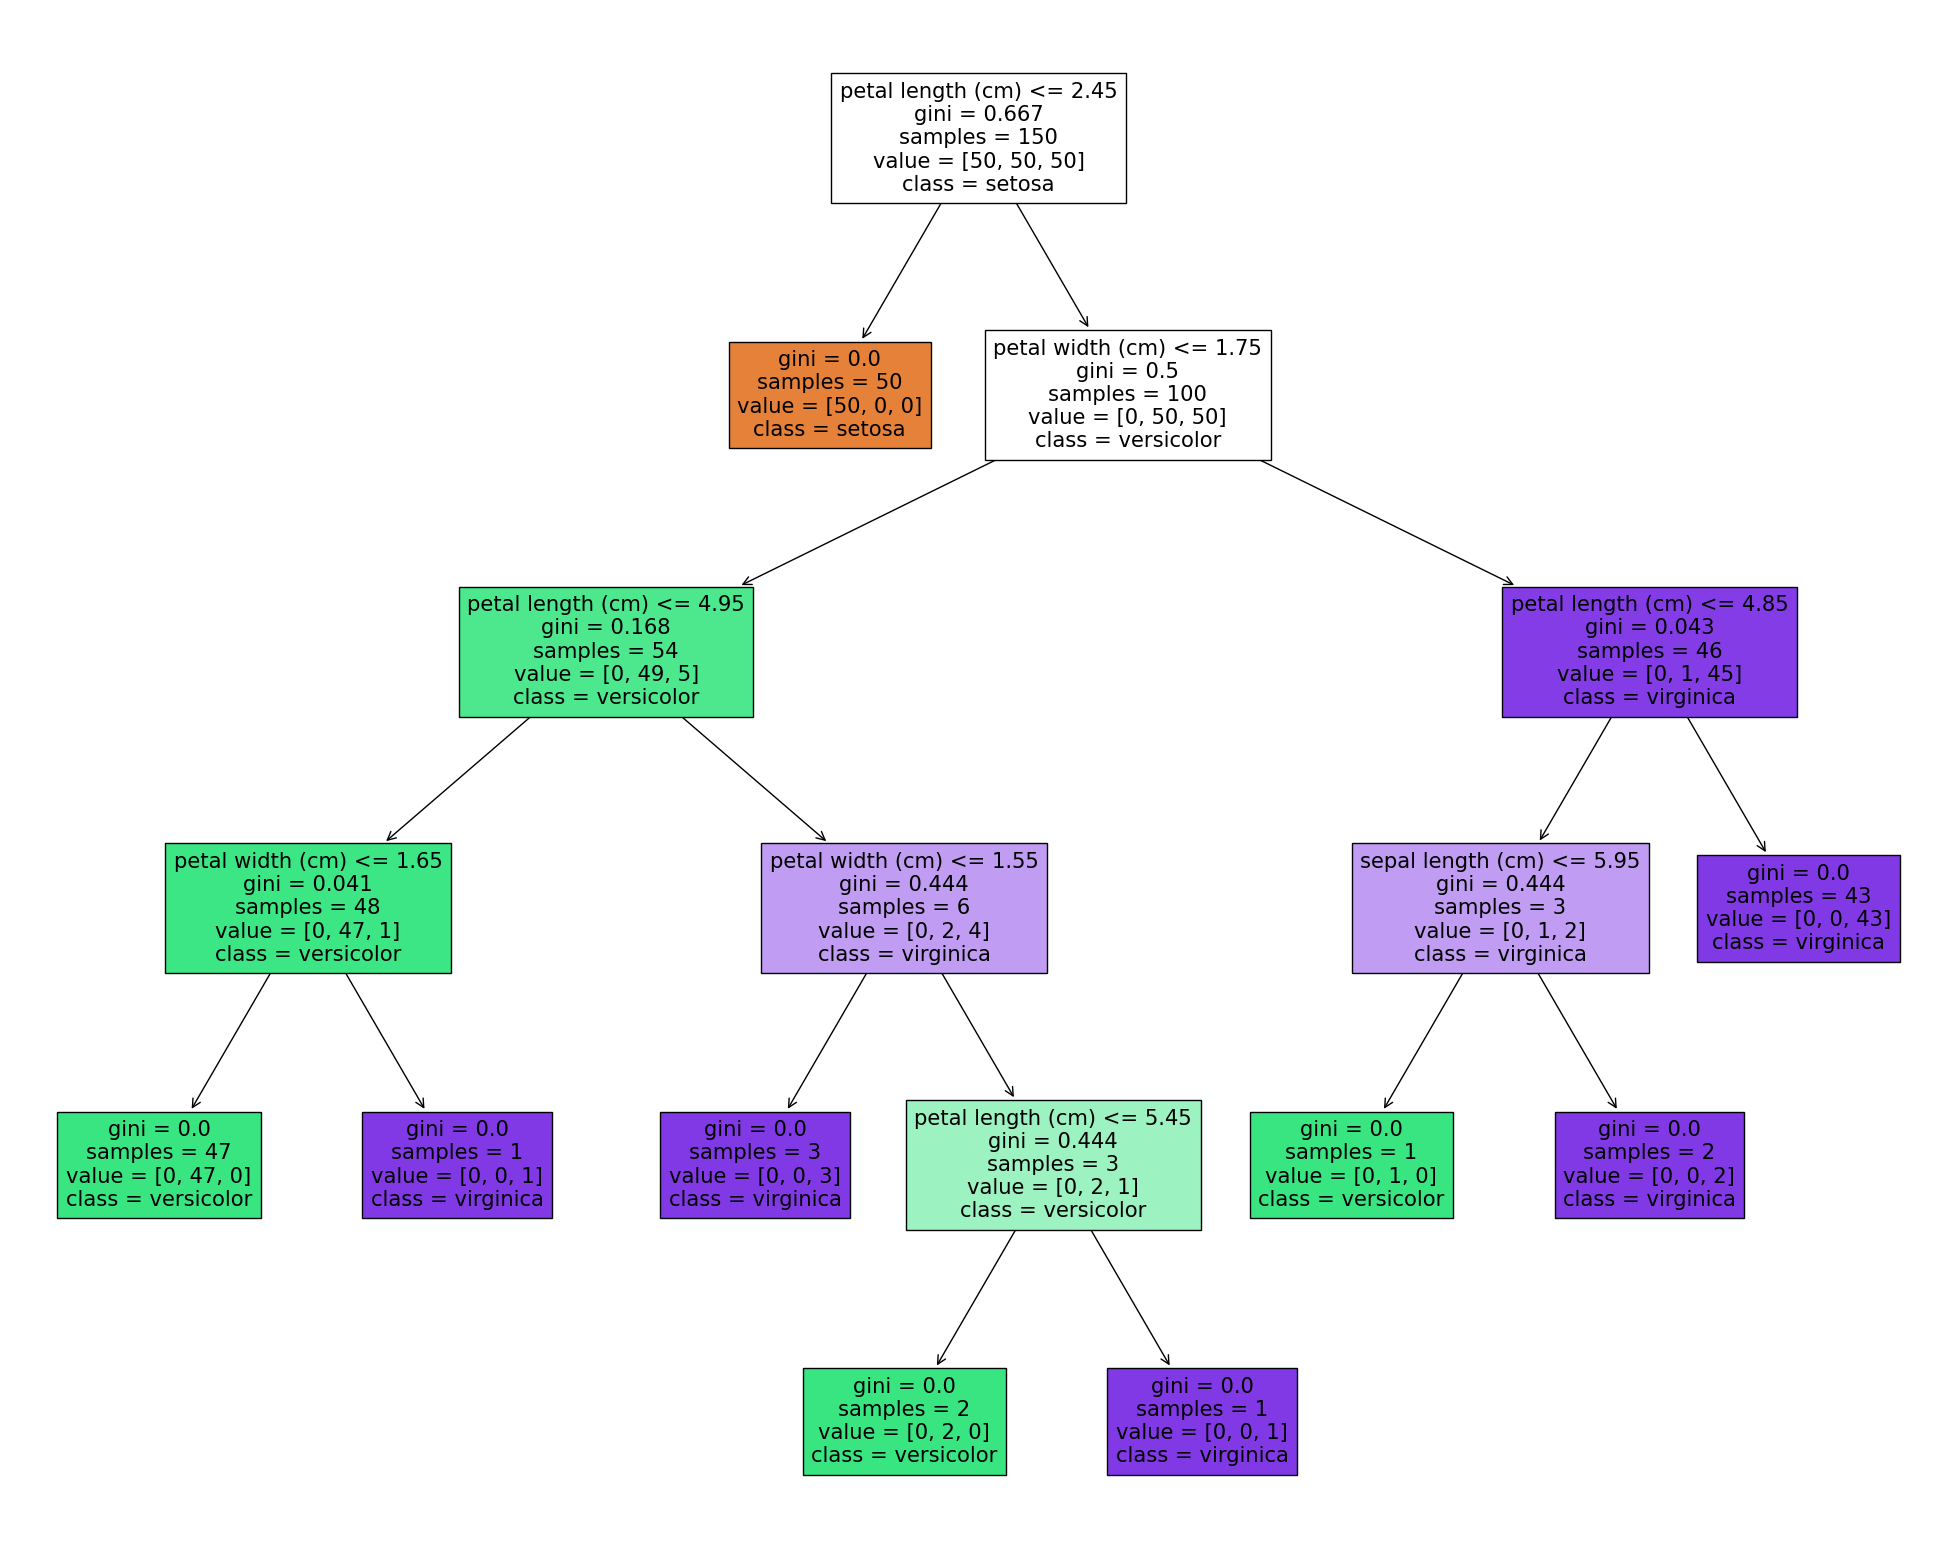

In [5]:
# Creating Visualization of Decision Tree
fig = plt.figure(figsize=(25,20))
ans = tree.plot_tree(dtc, 
                   feature_names=columnNames,  
                   class_names=targetNames,
                   filled=True)

I hope this gives you a good idea of how Decision Trees are structured and how they work. Now, let's try to apply the same concept to a more interesting dataset.

### What dataset will we be using, exactly?

Phishing is a type of cybercrime where attackers will pretend to be known/trusted entities and send malicious links to users as an attempt to extract sensitive information from them. With stolen information such as passwords or bank details, the attacker can access accounts, steal identities/data, and download all types of malware onto the user's computer. Typically, the attacker will do this by suggesting that there are has been suspicious activity on one of your accounts, issues with an invoice, or that you need to log in to your account again to verify it. In order to prevent these phishing attempts, researchers and experts have been analyzing features and applying classification models that help identify phishing links. 

Similarly, this is what we would like to accomplish with our dataset and using our knowledge of Python. This dataset contains 48 columns that detail the features collected from the URL of 5000 phishing pages and 5000 legitimate pages. The 'CLASS_LABEL' column, which tells us whether the link is phishing or legitimate, is binary (0 or 1) and uniformly distributed (even split between 0 and 1). This data was collected from January to May 2015 and from May to June 2017 using the Selenium WebDriver, a browser automation framework that allows for more precise and robust feature extraction.

If you would like to read more about this dataset and access it for yourself, you can do so through this link: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning

In [6]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('Phishing_Legitimate_full.csv')
df.head() # Only first few rows of data for viewing clarity

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### What can running ```.info()``` and ```.describe()``` tell us about our features?

In [7]:
feats_df = df.drop(columns=['id','CLASS_LABEL']) # Splitting off label column to create separate dataframe of just features

In [8]:
# Concise Dataset Summary
print(feats_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

As you can see from the summary above, our features in the dataset contain:
- 48 columns and 10000 rows
- 45 int64 columns and 3 float64 columns
- no missing values from any columns! Each column has 10000 non-null values!

In [9]:
# Descriptive Statistics Analysis
print(feats_df.describe())

            NumDots  SubdomainLevel     PathLevel     UrlLength       NumDash  \
count  10000.000000    10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.445100        0.586800      3.300300     70.264100      1.818000   
std        1.346836        0.751214      1.863241     33.369877      3.106258   
min        1.000000        0.000000      0.000000     12.000000      0.000000   
25%        2.000000        0.000000      2.000000     48.000000      0.000000   
50%        2.000000        1.000000      3.000000     62.000000      0.000000   
75%        3.000000        1.000000      4.000000     84.000000      2.000000   
max       21.000000       14.000000     18.000000    253.000000     55.000000   

       NumDashInHostname      AtSymbol   TildeSymbol  NumUnderscore  \
count       10000.000000  10000.000000  10000.000000    10000.00000   
mean            0.138900      0.000300      0.013100        0.32320   
std             0.545744      0.017319      0.113709     

Running ```.describe()``` gives us a descriptive statistics summary of the features dataset, displaying information such as the count, mean, std, min, max, etc. of the columns with numerical data. These statistics can help identify patterns between certain classes and determine outliers that may be affecting the results of our models. This is especially important for the Decision Tree model, which is prone to overfitting, as mentioned before.

### And a quick look at our target variable...

Our target variable is the ```'CLASS_LABEL'``` column from the dataset and it is a binary categorical variable that denotes whether the data entry describes a phishing URL (1) or a legitimate URL (0). Let's confirm that there are 5000 of each case, as stated in the dataset description.

In [10]:
# Viewing occurrences of each class in label column
df['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

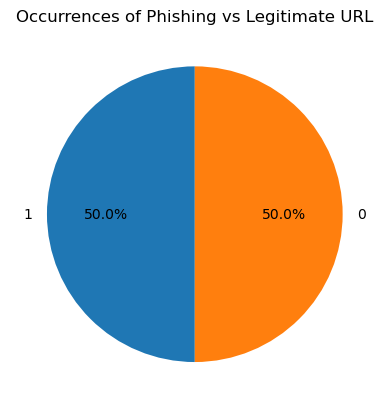

In [11]:
# Data Visualization Analysis
label_data = df['CLASS_LABEL'].value_counts()

# Pie Plot
plt.pie(label_data, labels=label_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Occurrences of Phishing vs Legitimate URL')
plt.show()

Based on what we know about our target variable, it is apparent that we should be using the Decision Tree model as a classifier!

Usually, preprocessing the data would be the next and most crucial step to ensuring that our model is able to make meaningful/accurate predictions. This could include filling in missing columns, removing duplicate entries, resampling to ensure even class distribution and more. However, the descriptions we obtained above seem to suggest that our dataset is already very clean and ready for use. 

### Decision Tree Model

Let's start by performing a train-test split on the features and the target from our data! We can do this very easily using the train_test_split module from the sklearn library. 

In [12]:
from sklearn.model_selection import train_test_split

# Performing a train-test split on the data for our model to use
X = feats_df
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We then create an object for the Decision Tree Classifier and fit our training data to the model. Using this trained model, we can use the X_test data to make predictions about the class labels of new data points. 

In [13]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

Now, we can compare our predicted results with the actual y_test results to measure the performance of the model. There are a couple different ways to evaluate a Decision Tree Classifier. Let's take a look at a few methods and compare them:

In [14]:
from sklearn.metrics import accuracy_score, classification_report
# Method 1
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using first method of predicting then using accuracy_score function:", accuracy)

# Method 2
print("Accuracy using second method of directly using .score function:", dt_clf.score(X_test, y_test))

# Method 3
report = classification_report(y_test, y_pred)
print(report)

Accuracy using first method of predicting then using accuracy_score function: 0.9725
Accuracy using second method of directly using .score function: 0.9725
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       988
           1       0.97      0.98      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



As you can see above, all 3 methods used to measure the accuracy of the model yield approximately the same predictive accuracy rate of 97%, which is a great result! This means that the Decision Tree Classifier model is able to predictively classify the difference between phishing URLs and legitimate URLs with an accuracy of 97%, using the features in our dataset.

With Decision Tree models, it may be interesting to follow that up by conducting research into which features contribute most significantly to creating the best splitting rules during the training phase. Let's try to do this for our dataset, visualizing the feature importances of the Decision Tree Classifier in descending order. Since there are so many features included in this dataset, we'll only show the top 10 most significant ones for clarity and readability.

#### Feature Importance for Decision Trees: 

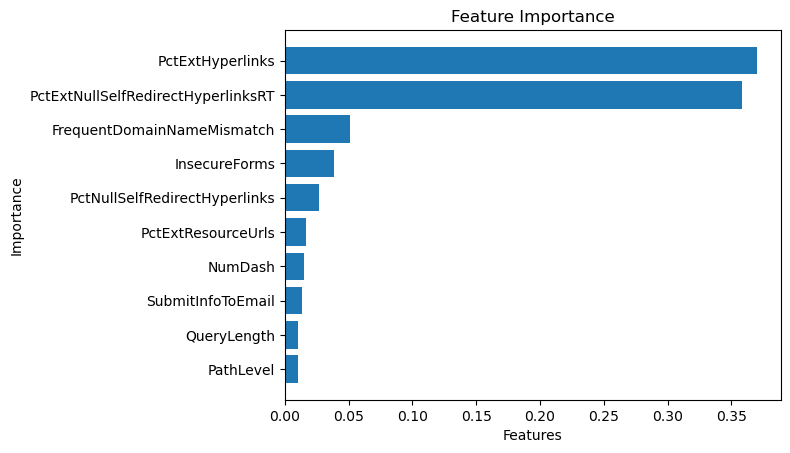

In [15]:
# Feature Importance
features = feats_df
targets = df['CLASS_LABEL']
model = DecisionTreeClassifier()
model.fit(features, targets)
feat_importance = model.feature_importances_

# Sort feature importance in descending order
sorted_index = feat_importance.argsort()[::-1]
sorted_importance = feat_importance[sorted_index]
sorted_columns = features.columns[sorted_index]

# Select top 10 most important features for plotting
top_sorted_importance = sorted_importance[:10]
top_sorted_columns = sorted_columns[:10]

# Plotting the bar graph
plt.barh(top_sorted_columns[::-1], top_sorted_importance[::-1])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Random Forest Model

The Random Forest model is a type of ensemble method that essentially combines multiple Decision Trees, each trained on a random subset of the data using random subsets of features, hence the name. It then aggregates the results from each of the Decision Trees to improve predictive accuracy, compared to having a singular Decision Tree. A singular Decision Tree, as stated before, is prone to instability and overfitting, which can negatively impact the performance of the model. In ML, ensemble methods are used to mitigate these effects by combining multiple ML models, allowing for more powerful and robust analyses.

The following illustration simply depicts the structure and algorithm of the Random Forest model:

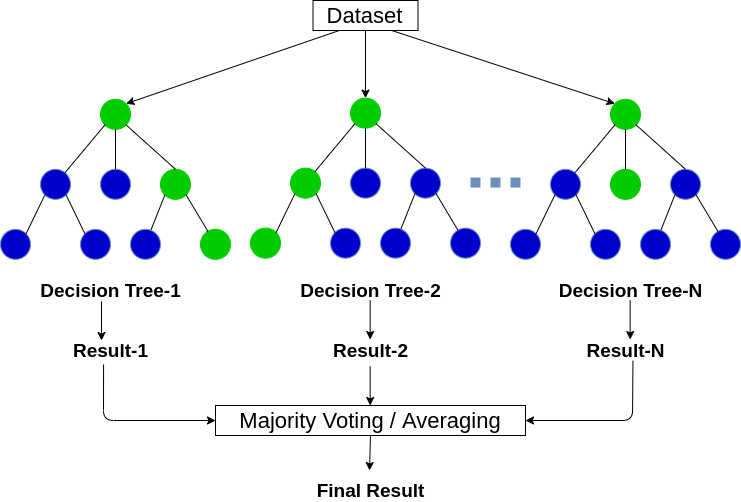

For our purposes in continuing with this dataset, we will be using the Random Forest model as a classifier to more accurately predict the differences between phishing URLs and legitimate URLs.

In [16]:
# Importing the Random Forest Classifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

In terms of procedure, the Random Forest Classifier is prepared, trained, and tested in the same way as the Decision Tree model. Similarly, let's begin by performing a train-test split on the data!

In [17]:
X = feats_df
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then, we create the object for the Random Forest Classifier and fit it with our training data. Now, the trained model is capable of making predictions on the class label (phishing or legitimate) of new data points. 

In [18]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

Let's evaluate this ensemble method using the same 3 methods as with the basic Decision Tree model. This will allow us to directly compare their performances:

In [19]:
# Method 1
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using first method of predicting then using accuracy_score function:", accuracy)

# Method 2
print("Accuracy using second method of directly using .score function:", rf_clf.score(X_test, y_test))

# Method 3
report = classification_report(y_test, y_pred)
print(report)

Accuracy using first method of predicting then using accuracy_score function: 0.986
Accuracy using second method of directly using .score function: 0.986
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       988
           1       0.99      0.99      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



By using an ensemble method like the Random Forest Classifier to reduce the impact of instability and overfitting, our accuracy rate in predicting phishing URLs vs legitimate URLs increased from 97% to approximately 99%! 

This time, more specifically, let's obtain a confusion matrix, which will show exactly how many correct/incorrect predictions we made in each class.

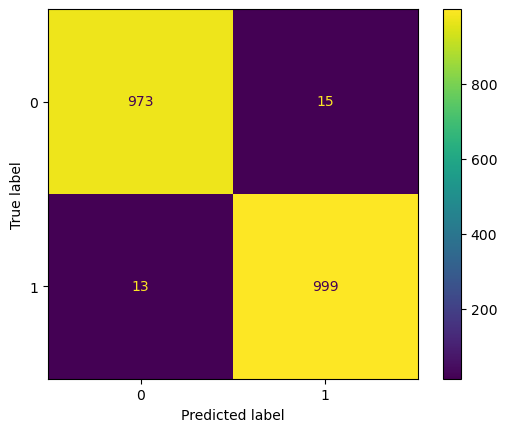

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_clf.classes_)
disp.plot()

Great results! The confusion matrix shows that our model rarely makes any incorrect predictions, regardless of the class! 

Once again, let's investigate the most significant features in determining the splitting rules for the Random Forest Classifier model. We will do this again by visualizing the top 10 most important features as a bar graph, in descending order. Do you think the key features will be the same as for a singular Decision Tree Classifier?

#### Feature Importance in Random Forest:

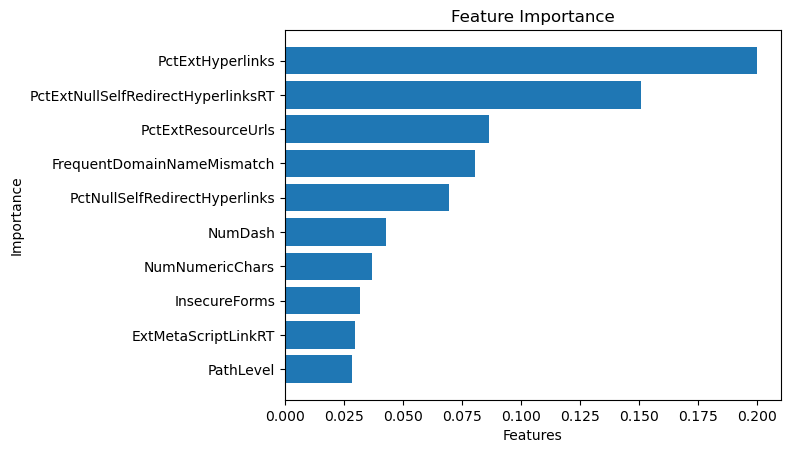

In [21]:
# Feature Importance
features = feats_df
targets = df['CLASS_LABEL']
model = RandomForestClassifier()
model.fit(features, targets)
feat_importance = model.feature_importances_

# Sort feature importances in descending order
sorted_index = feat_importance.argsort()[::-1]  
sorted_importance = feat_importance[sorted_index]
sorted_columns = features.columns[sorted_index]

# Select top 10 most important features for plotting
top_sorted_importance = sorted_importance[:10]
top_sorted_columns = sorted_columns[:10]

# Plotting the bar graph
plt.barh(top_sorted_columns[::-1], top_sorted_importance[::-1])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Your turn: Gradient Boosting!

Gradient Boosting is another ensemble method from sklearn that combines multiple Decision Trees to improve predictive accuracy. The algorithm aims to do this by iteratively correcting the mistakes of previous models as it adds new Decision Trees. Initially, it begins with a base model that is a "weak learner" and can make predictions, but is not highly accurate. Then, the residuals (differences between actual and predicted) are calculated and another Decision Tree is created to predict/correct the residuals. This process continues until all the trees (set in parameters) are combined to generate the final prediction of the Gradient Boosting model. The technique of Gradient Boosting Decision Trees significantly reduces the effect of overfitting and allows for a more accurate, robust prediction. 

This time, using what you've learned above, try to implement the ```GradientBoostingClassifier()``` model to predict phishing vs legitimate URLs on your own. The process for doing this is very much the same as what you've seen before, so refer to the material above as needed! To clarify, we want you to:
1. Split the data into training and testing sets
2. Create an object for the GradientBoostingClassifier() model
3. Fit the model with the training data
4. Use the model to make predictions about new data (the testing data)
5. Evaluate the performance of the model's predictions

Once you've tried this task on your own, you can uncomment the code block below to check out the answer key! Did we get the same results? How does this compare to the base Decision Tree model?

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

In [23]:
# Answer Key - Uncomment code below to see the results!

# X = feats_df
# y = df['CLASS_LABEL']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# gb_clf = GradientBoostingClassifier()
# gb_clf.fit(X_train, y_train)
# y_pred = gb_clf.predict(X_test)

# # Method 1
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy using first method of predicting then using accuracy_score function:", accuracy)

# # Method 2
# print("Accuracy using second method of directly using .score function:", gb_clf.score(X_test, y_test))

# # Method 3
# report = classification_report(y_test, y_pred)
# print(report)